The MIT License (MIT)<br>
Copyright (c) 2017 Massachusetts Institute of Technology<br>

Authors: Cody Rude and Victor Pankratius<br>
This software has been created in projects supported by the US National<br>
Science Foundation and NASA (PI: Pankratius)<br>

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:<br>

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.<br>

-----------------

### References

- <sub> [Mobile Crowd Sensing in Space Weather Monitoring: The Mahali Project](http://dx.doi.org/10.1109/MCOM.2014.6871665)<br>
Victor Pankratius, Frank Lind, Anthea Coster, Philip Erickson, Joshua Semeter. IEEE Communications Magazine, Special Issue on Mobile Crowd Sensing, 52(8), pp. 22-28, August 2014</sub>

- <sub>[The Mahali Project: Deployment Experiences from a Field Campaign in Alaska](https://www.ion.org/publications/abstract.cfm?articleID=13470)<br>
Anthea Coster, Victor Pankratius, Timothy Morin, Will Rogers, Frank Lind, Philip Erickson, David Mascharka, Don Hampton, Joshua Semeter.
Institute of Navigation: International Technical Meeting- GNSS in Environmentally Challenged Environments, Monterey, California, Jan 25-28, 2016</sub>

- <sub> [GPS Signal Corruption by the Discrete Aurora: Precise Measurements From the Mahali Experiment](http://dx.doi.org/10.1002/2017GL073570)
Joshua Semeter, Sebastijan Mrak, Michael Hirsch, John Swoboda, Gregory Starr, Donald Hampton, Philip Erickson, Frank Lind, Anthea Coster, Hassanali Akbari, Victor Pankratius, Geophysical Research Letters, Wiley, accepted Sep, 2017</sub>

- <sub> [GNSS-ISR data fusion: General framework with application to the high-latitude ionosphere](http://dx.doi.org/10.1002/2015RS005794)<br>
Joshua Semeter, Michael Hirsch, Frank Lind, Anthea Coster, Philip Erickson, Victor Pankratius, Radio Science, pp. 118-129, March 2016 </sub>

- <sub> [Mahali: Space Weather Monitoring Using Multicore Mobile Devices](http://goo.gl/YF0LG5)<br>
Victor Pankratius, Frank Lind, Anthea Coster, Philip Erickson, Joshua Semeter. American Geophysical Union, 46th Annual Fall Meeting, December 2013</sub>

- <sub> [Mahali: Mobile Phones and Cloud Computing in Space Weather and Beyond](http://goo.gl/cEJEZ7)<br>
Victor Pankratius, David Mascharka, Phil Erickson, Frank Lind, Anthea Coster, Michael Hirsch, John Swoboda, Joshua Semeter. 97th American Meteorological Society Annual Conference, 14th Conference on Space Weather, Seattle, January 22-27, 2017 </sub>

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import numpy as np

TEC data from Mahali <br>
MIT led NSF project studying the Earth’s ionosphere with GPS<br>
http://mahali.mit.edu/



- Receiver Name; Lat (deg), Long (deg), Altitude (meters)
- MAH02; 65.3824; -148.2572; 313.82
- MAH03; 65.6201; -149.0948; 534.77
- MAH04; 65.4988; -148.7776; 479.26
- MAH05; 65.5241; -148.5478; 244.03
- MAH06; 65.2884; -148.1655; 303.10
- MAH07; 65.2582; -146.7602; 381.92
- MAH08; 65.1179; -147.4329; 554.99
- MAH09; 65.3637; -146.0895; 709.70
- MAH13; 65.4148; -145.5928; 712.48

In [68]:
station_list = [ 'mh02', 'mh03', 'mh04', 'mh05', 'mh06', 'mh07', 'mh08', 'mh09', 'mh13']
lon_list = [-148.2572, -149.0948, -148.7776, -148.5478, -148.1655, -146.7602, -147.4329, -146.0895, -145.5928]
lat_list = [65.3824, 65.6201, 65.4988, 65.5241, 65.2884, 65.2582, 65.1179, 65.3637, 65.4148]

Function to plot receivers on map

In [137]:
def plotGPSReceiversOnMap():

    # Create map for coordinates
    llat = 55.8
    ulat = 70.9
    llon = -168.9
    rlon = -137.7


    plt.gcf().set_size_inches(10,10);


    bmap = Basemap(llcrnrlat=llat, urcrnrlat=ulat, llcrnrlon=llon, 
                   urcrnrlon=rlon,projection='merc', lon_0=np.mean([llon,rlon]), 
                   lat_0=np.mean([llat,ulat]), resolution='i', area_thresh=10000);

    bmap.shadedrelief();

   # bmap.scatter(lon_list, lat_list, latlon=True, color='red');
    plt.title("Locations of Mahali GPS Receivers in Alaska", fontsize=14)
    
    scatter_list = []
    for label, lon, lat in zip(station_list, lon_list, lat_list):
        x, y = bmap(lon,lat)
        # plt.gca().annotate(label[2:], xy=(x,y), xytext=(5,-16), ha='right', textcoords='offset points', fontsize=11);
        # legend colors mahal
        scatter_list.append(bmap.scatter(lon, lat, latlon=True, label=label, s=62))
    bmap.drawmapscale(-144,58,np.mean([llon,rlon]), np.mean([ulat, llat]), 500, barstyle='fancy', fontsize=14)
    leg = plt.legend(scatter_list, station_list, fontsize=14)

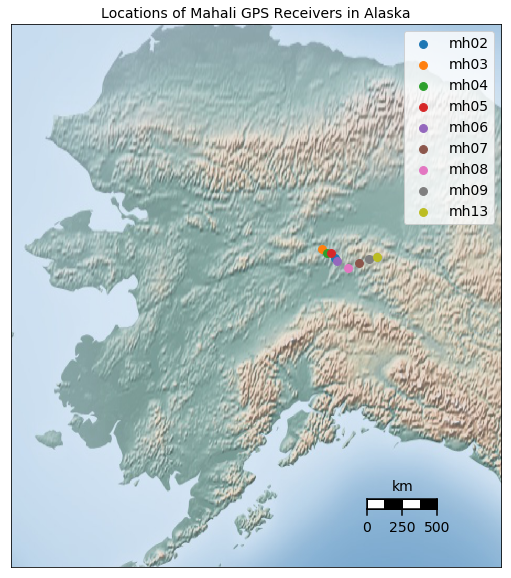

In [138]:
plotGPSReceiversOnMap();

In [2]:
from skdaccess.framework.param_class import *
from skdaccess.geo.mahali.tec.data_fetcher import DataFetcher

In [38]:
mahalidf = DataFetcher([AutoList(station_list)])

In [39]:
dw = mahalidf.output()

100%|██████████| 222/222 [02:19<00:00,  1.59it/s]


In [5]:
label, data = next(dw.getIterator())

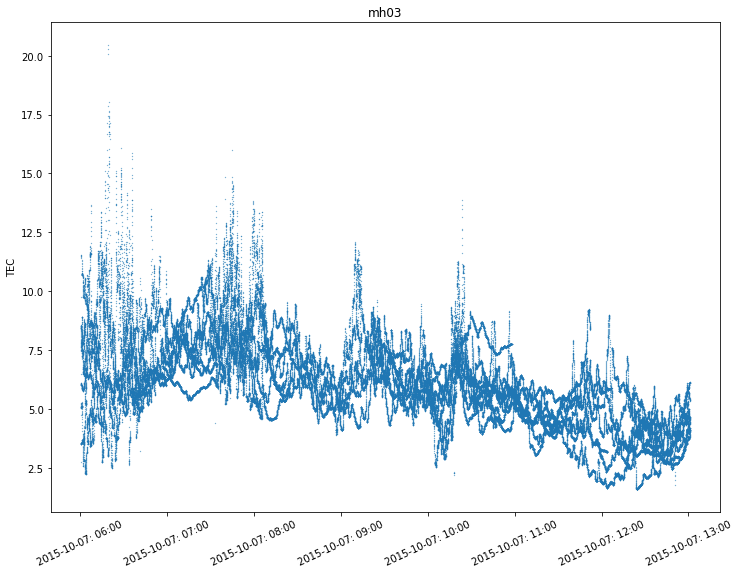

In [14]:
plt.plot(data.vertical_tec[data.elevation > 20.0],'.', markersize=0.5);
plt.gcf().set_size_inches(12,9)
plt.title(label);
plt.ylabel('TEC');
plt.xticks(rotation=25);
datefmt = mdates.DateFormatter('%Y-%m-%d: %H:%M');
plt.gca().xaxis.set_major_formatter(datefmt);

In [36]:
def plotAllStations(start_date, end_date):
    plt.gcf().set_size_inches(12,9)

    for index, (label, data) in enumerate(dw.getIterator()):
        plt.subplot(3,3, index+1)
        plt.title(label);
        plt.ylabel('TEC');
        plt.xticks(rotation=25);
        plt.plot(data.vertical_tec[data.elevation > 20.0],'.', markersize=0.5);
        datefmt = mdates.DateFormatter('%Y-%m-%d: %H:%M');
        plt.gca().xaxis.set_major_formatter(datefmt);
        plt.xlim(start_date, end_date)
    plt.tight_layout()

Plot data for all days

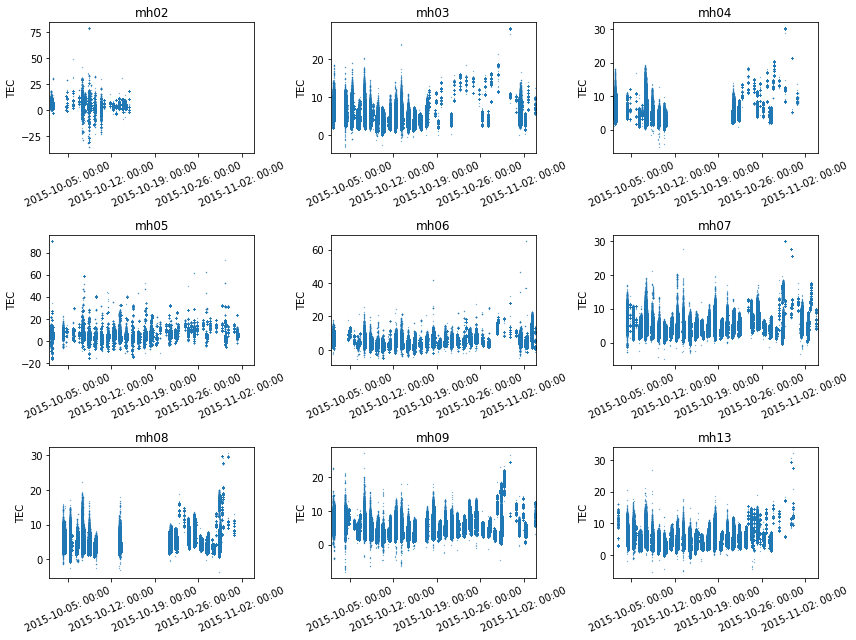

In [42]:
plotAllStations(pd.to_datetime('2015-10-02 00:00:00'), pd.to_datetime('2015-11-04 00:00:00'))

Plot data for 2015-10-07 (day with enhanced ionospheric activity)

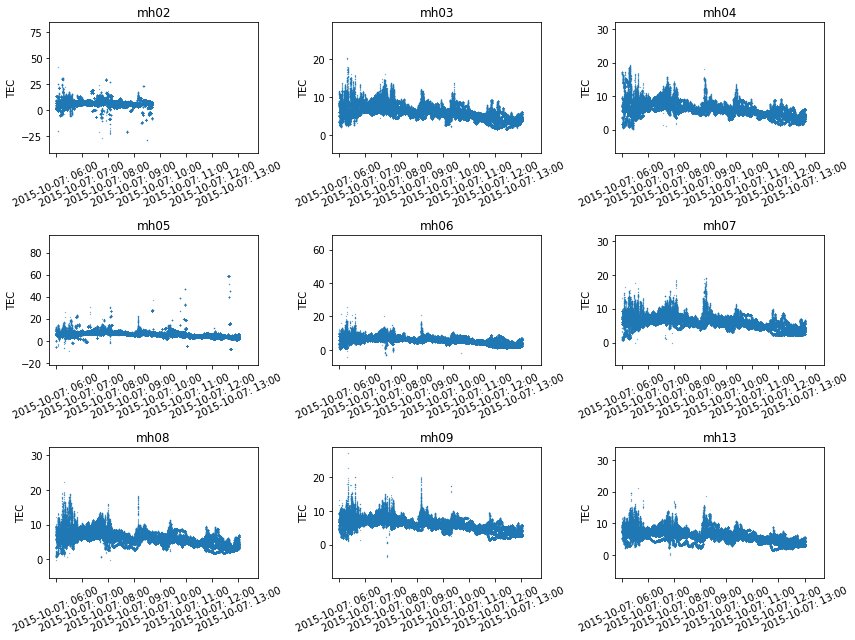

In [43]:
plotAllStations(pd.to_datetime('2015-10-07 05:45:00'), pd.to_datetime('2015-10-07 013:45:00'))